#Q - Rotating shaft on a flexural structure: Group Rankine-RF

##Group Assignment 

* E/17/031
* E/17/152
* E/17/169
* E/17/317

##Problem Description

* https://youtu.be/R2hO--TIjjA



1.   Answer the in the lab, [pre-requisite competency assessment quiz.](https://feelsnew.pdn.ac.lk/mod/quiz/view.php?id=7869)
2.   With detailed justification derive a finite dimensional approximation of the small amplitude motion of the system shown in the video assigned to your group. The model should capture the first four modes of resonance of the system.
3. Simulate and animate the small amplitude motion of the system and use the simulations to provide, with justification, a qualitative desrcription of the small amplitude motion of the system
4. Provide at least two soultions that will allow you to safely operate at frequencies near the second mode of resonance of the system. Justify your answer using simulations and compare the pros and cons of the two solutions.
4. Use a Rashpberry Pi based data aquistion system and use that to measure the natural frequencies of the 2-DOF rotational plus translational system in the applied mechanics lab using FFTs methods.
5. All your work will be collected and reported in a .ipynb notebook that will be maintained in a Github repository allocated to your group. All equations and mathematical expressions should be typed in LaTeX and all comutations should be performed using Python and should be contained in the same .ipynb notebbok.



**Static Balance**
simple situation where two masses are mounted on a shaft. If the shaft is to be statically balanced, the moment due to weight of mass (1) tending to rotate the shaft clockwise must equal that of mass (2) trying to turn the shaft in the opposite direction.

\begin{align}
W_1r_1=W_2 r_2 ---------(1)
\end{align}

 Hence for static balance,The same principle holds if there are more than two masses mounted on the shaft.

 \begin{align}
W_1r_1cos(\alpha_1)=W_2r_2cos(\alpha_2)+ W_3r_3cos(\alpha_3)
\end{align}

**Dynamic Balancing**
The masses are subjected to centrifugal forces when the shaft is rotating. Two conditions must be satisfied if the shaft is not to vibrate as it rotates:

1. There must be no out of balance centrifugal force trying to deflect the shaft.

2. There must be no out of balance moment or couple trying to twist the shaft.

If these conditions are not fulfilled, the shaft is not dynamically balanced.

Apply condition 1,

\begin{align}
F_1=F_2 -------(3)
\end{align}

The centrigugal force is $mr\omega^2$ or $W/2r\omega^2$. Hence by (3),

\begin{align}
\frac{W_1}{g}r_1\omega^2 =\frac{W_2}{r_2}r_2\omega^2
\end{align}

The angular speed of rotation is the same for each mass so that for dynamic balance,

\begin{align}
W_1r_1=W_2r_2
\end{align}

This is the same result obtained in equation (1) for the balance of the shaft. thus if a shaft is dynamically balanced it will also be statically balanced.

The second condition is satisfied by taking moments about some convenient datum such as one of the bearings. Thus,

\begin{align}
a_1F_1=a_2F_2
\end{align}



**motion equations for the static unbalance**
\begin{align}
m\ddot{x}+b\dot{x}+kx=Fcos(wt) \\
m\ddot{y}+b\dot{y}+ky=Fsin(wt)
\end{align}
where $b$ is the damping coefficient and $k$ is spring coefficient

**motion equations for dynamic unbalance**
\begin{align}
I\ddot{\theta}_{x}+\omega I\dot{\theta}_{y}+K\theta_{x} = Mcos(wt) \\
I\ddot{\theta}_{y}-\omega I\dot{\theta}_{x}+K\theta_{y} = Msin(wt)
\end{align}

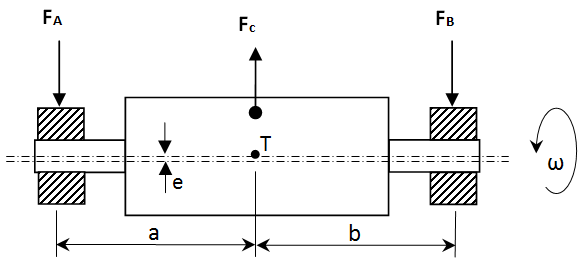

Static Unbalance Rotating System

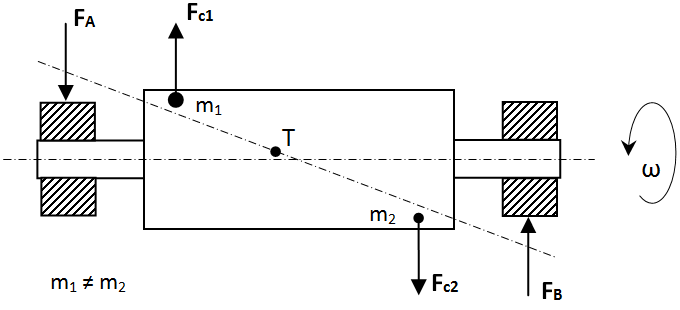

Dyanamc UNbalance Rotating System

Adding the Balancing mass

Dyanamic Balancing:

\begin{align}
I_t\ddot{\theta}+\omega I_p\dot{\theta_y}+k\theta=Mcos(wt)-(m_b1+m_b2)(i-i_1-i_2)r_b\omega^2 cos(\omega t) \\
\end{align}

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
J = 0.1    # Moment of inertia
m = 0.05   # Mass
r = 0.1    # Radius
L = 0.3    # Length
E = 2e11   # Young's modulus
rho = 7850 # Density

# Compute system matrices
I = np.pi * r ** 4 / 4
M = np.diag([m*(r**2)/2, J/2])
K = np.array([[3*E*I/L**3, 0],
              [0, 3*E*I/L]])

# Compute eigenvalues and eigenvectors
omega, phi = np.linalg.eig(K)
omega = np.sqrt(omega)
phi = phi.T

# Compute scaling factors
lambda_ = np.sqrt(np.diag(np.dot(phi, np.dot(M, phi.T))))

# Define simulation parameters
t_span = np.linspace(0, 5, 1000)
q0 = np.zeros((4, 2))  # Initial modal coordinates

# Compute mode shapes and displacements
mode_shapes = phi[:4]
displacements = np.zeros((len(t_span), 2))
for i in range(4):
    q = q0[i]
    for j, t in enumerate(t_span):
        q = q * np.cos(lambda_[i] * omega[i] * (t - t_span[j - 1])) + \
            ((q0[i] / lambda_[i] / omega[i]) * np.sin(lambda_[i] * omega[i] * (t - t_span[j - 1])))
        displacements[j] += mode_shapes[i] * q

# Plot displacements
fig, ax = plt.subplots()
ax.plot(t_span, displacements[:, 0], label='x')
ax.plot(t_span, displacements[:, 1], label='y')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Small Amplitude Motion of Balanced Rotor')
ax.legend()
plt.show()




IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
J = 0.1    # Moment of inertia
m = 0.05   # Mass
r = 0.1    # Radius
L = 0.3    # Length
E = 2e11   # Young's modulus
rho = 7850 # Density

# Compute system matrices
I = np.pi * r ** 4 / 4
M = np.diag([m*(r**2)/2, J/2])
K = np.array([[3*E*I/L**3, 0],
              [0, 3*E*I/L]])

# Compute eigenvalues and eigenvectors
omega, phi = np.linalg.eig(K)
omega = np.sqrt(omega)
phi = phi.T

# Compute scaling factors
lambda_ = np.sqrt(np.diag(np.dot(phi, np.dot(M, phi.T))))

# Define simulation parameters
t_span = np.linspace(0, 5, 1000)
q0 = np.zeros((4, 2))  # Initial modal coordinates

# Compute mode shapes and displacements
mode_shapes = phi[:4]
displacements = np.zeros((len(t_span), 2))
for i in range(4):
    q = q0[i]
    for j, t in enumerate(t_span):
        q = q * np.cos(lambda_[i] * omega[i] * (t - t_span[j - 1]))+\((q0[i] / lambda_[i] / omega[i]) * np.sin(lambda_[i] * omega[i] * (t - t_span[j - 1])))
        displacements[j] += mode_shapes[i] * q

# Plot displacements
fig, ax = plt.subplots()
ax.plot(t_span, displacements[:, 0], label='x')
ax.plot(t_span, displacements[:, 1], label='y')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Small Amplitude Motion of Balanced Rotor')
ax.legend()
plt.show()


<ipython-input-8-a8d7b6a73277>:36: RuntimeWarning: invalid value encountered in true_divide
  q = q * np.cos(lambda_[i] * omega[i] * (t - t_span[j - 1]))/((q0[i] / lambda_[i] / omega[i]) * np.sin(lambda_[i] * omega[i] * (t - t_span[j - 1])))


IndexError: ignored

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
J = 0.1    # Moment of inertia
m = 0.05   # Mass
r = 0.1    # Radius
L = 0.3    # Length
E = 2e11   # Young's modulus
rho = 7850 # Density

# Compute system matrices
I = np.pi * r ** 4 / 4
M = np.diag([m*(r**2)/2, J/2])
K = np.array([[3*E*I/L**3, 0],
              [0, 3*E*I/L]])

# Compute eigenvalues and eigenvectors
omega, phi = np.linalg.eig(K)
omega = np.sqrt(omega)
phi = phi.T

# Compute scaling factors
lambda_ = np.sqrt(np.diag(np.dot(phi, np.dot(M, phi.T))))

# Define simulation parameters
t_span = np.linspace(0, 5, 1000)
q0 = np.zeros((4, 2))  # Initial modal coordinates

# Compute mode shapes and displacements
mode_shapes = phi[:4]
displacements = np.zeros((len(t_span), 2))
for i in range(4):
    q = q0[i]
    for j, t in enumerate(t_span):
        q = q * np.cos(lambda_[i] * omega[i] * (t - t_span[j])) + ((q0[i] / lambda_[i] / omega[i]) * np.sin(lambda_[i] * omega[i] * (t - t_span[j]))) 
        displacements[j] += mode_shapes[i] * q

# Plot displacements
fig, ax = plt.subplots()
ax.plot(t_span, displacements[:, 0], label='x')
ax.plot(t_span, displacements[:, 1], label='y')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Displacement (m)')
ax.set_title('Small Amplitude Motion of Balanced Rotor')
ax.legend()
plt.show()


IndexError: ignored

Rotating machinery is commonly used in mechanical and electromechanical systems that include rotors of motors and engines, machining tools, industrial turbomachinery, etc. In case of unbalanced distribution of rotating masses around an axis of rotation the rotor unbalance arises. This presents a serious engineering problem because it is a major cause of excessive vibrations, esp. at higher speeds. Arising large centrifugal unbalanced forces can lead to damage of bearings and finally to destruction of machines. This is the reason why solving of the unbalance is a basic concern in design and operation of the machinery.

Vibration of the rotating machinery is suppressed by eliminating the root cause of vibration – the system unbalance. Practically, vibrations cannot reach zero values but usually it is acceptable to decrease them to a value lower than that one prescribed for a certain quality class of the machinery. Balancing of the rotor increases the bearing life, minimizes vibrations, audible noise, power losses, and finally it results in increased quality of products.

Considered in this study are two cases of cylindrical rotating bodies: a rotor and a long shaft.Both rotating bodies are similar, what concerns their dynamical properties and calculation of possible vibrations. Here, the rotor is considered to be fixed, resting on massless shaft that is supported on bearings and the shaft is circular and solid.
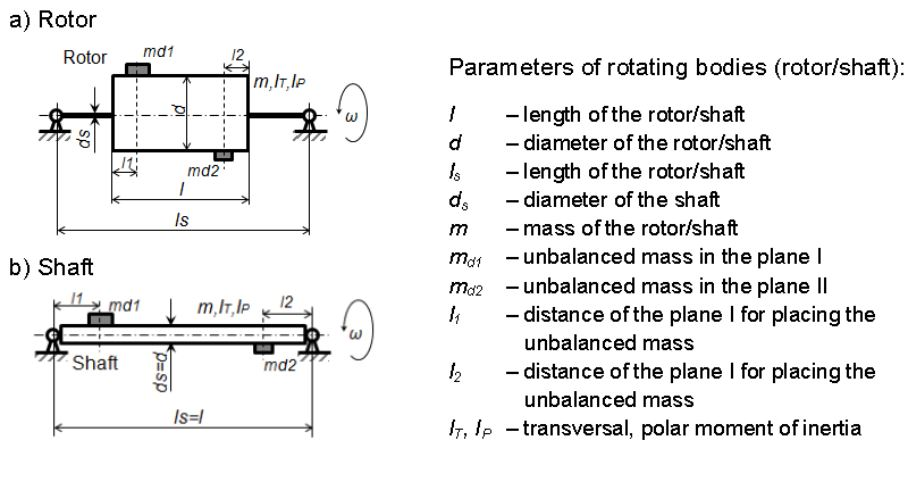

The unbalanced rotating body can move in radial direction horizontally and vertically and it can also rotate around axes x, y, that are in the plane perpendicular to the axis z of rotation.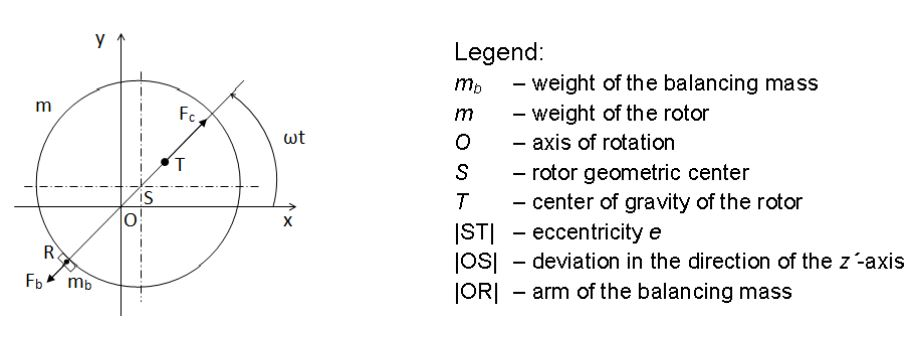

Analysis of arising radial forces in case of the unbalanced rotor and principle of its balancing by adding a balanced mass results from the drawing in Fig. 2. Due to the unevenly distributed mass around the axis of rotation, the center of gravity is shifted from its geometric center by the eccentricity e
 (given by the distance ST−
). The centrifugal force Fc
 during rotation causes that the rotor is deviated from its direction, what leads to the increase of the distance between the center of gravity and axis of rotation. It is obvious that to eliminate the eccentricity e
 a small balancing mass must be placed in opposite direction so that its centrifugal force Fb
 would also act in this direction – against the force Fc
. From the Newton's Third Law of Motion it is obvious that at rotation, the centrifugal force caused by the mass mn
 on the radius r
 is equal to the centrifugal force activated by mass m
 rotating on the radius e
:

$m_nr=me$\
eccentricity  $e=\frac{m_nr}{m}$\
For tolerable maximal residual unbalance e,\
$e=\frac{v}{\omega}=\frac{v}{2πf}$

According to position of unevenly distributed mass of the rotating body round and along the axis of rotation we distinguish a static unbalance and the dynamic one. To activate an unbalance of the rotating body two balancing masses having different value of the mass m1
 and m2
 are placed into two different planes that are mutually placed at farther distance and in radial direction they are shifted by the angle 180 °. The mass activating the static unbalance of the originally uniformly rotating body is given by the difference of both masses:\
 $m_s=m_{d1}-m_{d2}$

The most frequently used model of unbalanced rotating body is based on the so called Jeffcott model of an unbalanced rotor developed by H. H. Jeffcott in 1919.
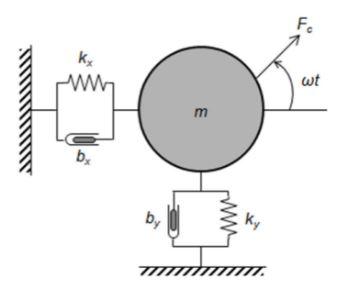

The model also contains flexural rigidity and damping of the bearing what can be considered as a spring and damper rotating synchronously with the rotor. In this way, the rotor is connected with the ground through linear springs and dampers and the movement in x-and y-directions is actuated by time-variable radial components of the rotating vector of the force. It is a consequence of the rotating unbalanced rotor. Motion equations for the described substitute model are derived from the Newton’s Second Law.

\begin{align}
m\ddot{x}+b_x\dot{x}+k_xx=F_ccos(\omega_t)\\
m\ddot{y}+b_y\dot{y}+k_yy=F_csin(\omega_t)
\end{align}
where b refers to damping and k refers to stiffness.\
For static unbalance,
\begin{align}
m_c\ddot{x}+b\dot{x}+kx=F_ccos(\omega_t)\\
m_c\ddot{y}+b\dot{y}+ky=F_csin(\omega_t)
\end{align}
For dynamic unbalance,\
\begin{align}
I_T\ddot\theta_x+\omega I_P\dot\theta_y+K\theta_x=Mcos(\omega t)\\
I_T\ddot\theta_y-\omega I_P\dot\theta_x+K\theta_y=Msin(\omega t)
\end{align}

where for the centrifugal force Fc
 and torque M
, caused by unbalance, we can derive,
\begin{align}
F_c=m_s(r+z')\omega^2\\
M=(m_{d1}+m_{d2})(l-l_1-l_2)r\omega^2
\end{align}

The value of $(r+z')$
 presents an instantaneous value of the arm of unbalancing and $z'$
 is total deviation presenting the amplitude of total vibration of the rotor:
$z'=\sqrt{x^2+y^2}$\
For twist angle $γ=\sqrt{\theta_x^2+\theta_y^2}$\
To eliminate the centrifugal force Fc
 and resulting torque M
 caused by the rotor unbalance it is necessary to add or remove a certain mass in both planes.
